In [5]:
import pandas as pd
import numpy as np

import contractions

import nltk

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer, PorterStemmer

lmtzr = WordNetLemmatizer()
stmr = PorterStemmer()

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import classification_report, confusion_matrix


from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression


In [6]:
data = pd.read_csv('Primary_dataset.csv')
data.head()
data.shape

(6103, 2)

In [7]:
data["review_text"] .head()

0    The service I had from the staff was very good...
1    The staff were lovely and I couldn't fault it....
2    I attended Russell's hall a&e department with ...
3    My mom was admitted here,  She cried that one ...
4    The 2☆ go to the staff on the MECU who made su...
Name: review_text, dtype: object

In [8]:
def rate_converter(rate):
    rate = int(rate)
    if rate == 3:
        rate = 0
        return rate
    elif rate > 3 :
        rate = 1
        return rate
    else:
        rate = -1
        return rate
        
data['review_rating'] = data['review_rating'].apply(rate_converter)
data['review_rating'].head()

0    1
1    1
2    1
3   -1
4   -1
Name: review_rating, dtype: int64

In [9]:
def contractions_fixer(review):
    '''print("Input review:", review)'''

    newreview = contractions.fix(review)
    '''print("Input review:", newreview)'''
    return newreview
    
data['review_text'] = data['review_text'].apply(contractions_fixer)

In [10]:
def lowercasing(review):
    '''print("Inp review:", review)'''
    new_low_review = review.lower()
    '''print("end review:", new_low_review)'''
    return new_low_review
 
data['review_text'] = data['review_text'].apply(lowercasing)

In [11]:
def tokenise_text(review):
    '''print("Input review:", review)'''
    tokenise_reviews = word_tokenize(review)
    '''print("Input review:", review)'''
    return tokenise_reviews

data['review_text'] = data['review_text'].apply(tokenise_text)
data.head()

,review_text,review_rating
0,"[the, service, i, had, from, the, staff, was, ...",1
1,"[the, staff, were, lovely, and, i, could, not,...",1
2,"[i, attended, russell, 's, hall, a, &, e, depa...",1
3,"[my, mom, was, admitted, here, ,, she, cried, ...",-1
4,"[the, 2☆, go, to, the, staff, on, the, mecu, w...",-1


In [12]:
def words_removal(review):
    prepositions = ["about", "above", "across", "after", "against", "along", "amid", "among", "around", "as", "at", "before", "behind", "below", "beneath", "beside", "besides", "between", "beyond", "but", "by", "concerning", "considering", "despite", "down", "during", "except", "for", "from", "in", "inside", "into", "like", "near", "next", "of", "on", "onto", "out", "outside", "over", "past", "regarding", "round", "since", "through", "throughout", "till", "to", "toward", "under", "underneath", "until", "unto", "upon", "with", "within", "without"]
    Articles = ["a", "an", "the"]
    Pronouns = ["i", "you", "he", "she", "it", "we", "they", "me", "him", "her", "us", "them", "my", "your", "his", "her", "its", "our", "their", "mine", "yours", "hers", "ours", "theirs"]
    Conjunctions = [ "and", "but", "or", "nor", "so", "yet", "for"]
    Verbs = ["is", "are", "am", "was", "were", "be", "been", "being", "have", "has", "had", "do", "does", "did", "can", "could", "will", "would", "shall", "should", "may", "might", "must", "ought", "need", "dare"]
    other = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z','&']

    '''print("Inp review:", review)'''
    review_pro_r = [review for review in review if review not in Pronouns]
    review_art_r = [review_pro_r for review_pro_r in review_pro_r if review_pro_r not in Articles]
    review_pre_r = [review_art_r for review_art_r in review_art_r if review_art_r not in prepositions]
    review_con_r = [review_pre_r for review_pre_r in review_pre_r if review_pre_r not in Conjunctions]
    review_ver_r = [review_pre_r for review_pre_r in review_pre_r if review_pre_r not in Verbs]
    review_ver_r = [review_pre_r for review_pre_r in review_pre_r if review_pre_r not in Verbs]


    '''print("new review:", review_ver_r)'''
    return review_ver_r

data['review_text'] = data['review_text'].apply(words_removal)


In [13]:

def lemmatized_text(review):
    '''print("Inp review:", review)'''
    lemmatized_list = [lmtzr.lemmatize(word) for word in review]
    '''print("new review:", lemmatized_list)''' 
    return lemmatized_list

data['review_text'] = data['review_text'].apply(lemmatized_text)
data['review_text'].head()

0    [service, staff, very, good, ,, and, waiting, ...
1    [staff, lovely, and, not, fault, ., not, blame...
2    [attended, russell, 's, hall, &, e, department...
3    [mom, admitted, here, ,, cried, that, one, nur...
4    [2☆, go, staff, mecu, who, made, sure, that, b...
Name: review_text, dtype: object

In [14]:
def stemerise_text(review):
    '''print("Inp review:", review)'''
    stemmed_list = [stmr.stem(word) for word in review]
    '''print("new review:", stemmed_list)''' 
    return stemmed_list

data['review_text'] = data['review_text'].apply(stemerise_text)
data.head()

,review_text,review_rating
0,"[servic, staff, veri, good, ,, and, wait, time...",1
1,"[staff, love, and, not, fault, ., not, blame, ...",1
2,"[attend, russel, 's, hall, &, e, depart, heart...",1
3,"[mom, admit, here, ,, cri, that, one, nurs, re...",-1
4,"[2☆, go, staff, mecu, who, made, sure, that, b...",-1


In [15]:
data.head()

,review_text,review_rating
0,"[servic, staff, veri, good, ,, and, wait, time...",1
1,"[staff, love, and, not, fault, ., not, blame, ...",1
2,"[attend, russel, 's, hall, &, e, depart, heart...",1
3,"[mom, admit, here, ,, cri, that, one, nurs, re...",-1
4,"[2☆, go, staff, mecu, who, made, sure, that, b...",-1


In [16]:
def join_sentence(review):
    '''print("Inp review:", review)'''
    joint_list = ' '.join(review)
    '''print("new review:", joint_list)''' 
    return joint_list
    
data['review_text'] = data['review_text'].apply(join_sentence)

In [17]:
reviews = data["review_text"]  
ratings = data["review_rating"]

Text(0.5, 1.0, 'Sentiment Distribution')

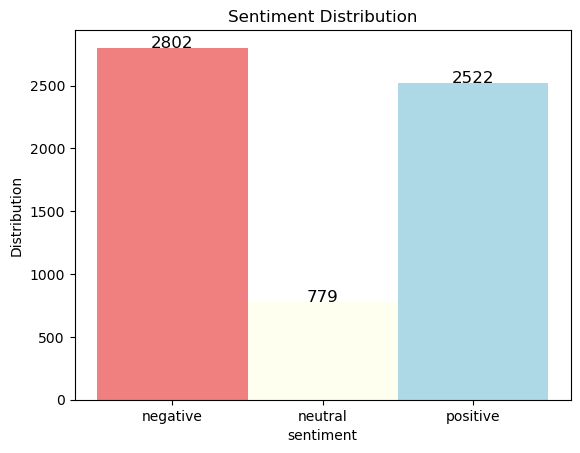

In [18]:
negative = data[data["review_rating"]== -1].shape[0]
positive = data[data["review_rating"]== 1].shape[0]
neutral = data[data["review_rating"]== 0].shape[0]

plt.bar([1,2,3],[negative,neutral, positive], tick_label = ['negative','neutral','positive'], width= 1, color =['lightcoral','ivory','lightblue'])

plt.text(1,negative,negative, fontsize= 12, color ='black' ,ha="center")
plt.text(2,neutral,neutral, fontsize= 12, color ='black' ,ha="center")
plt.text(3,positive,positive, fontsize= 12, color ='black' ,ha="center")


plt.xlabel("sentiment")
plt.ylabel("Distribution")
plt.title("Sentiment Distribution")

In [19]:
X_train, X_test, y_train, y_test = train_test_split(reviews,ratings, test_size=0.2)

In [20]:
print(X_train.shape, X_test.shape)

(4882,) (1221,)


In [21]:
vectorizer = CountVectorizer()
V_X_train = vectorizer.fit_transform(X_train.values)

In [22]:
print(V_X_train.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
V_X_train.shape

(4882, 8295)

In [24]:
NB_model = MultinomialNB()
NB_model.fit(V_X_train,y_train)

MultinomialNB()

In [25]:
LR_model = LogisticRegression(solver='liblinear')
LR_model.fit(V_X_train,y_train)

LogisticRegression(solver='liblinear')

In [26]:
RF_model = RandomForestClassifier()
RF_model.fit(V_X_train,y_train)

RandomForestClassifier()

In [27]:
SVM_model = SVC()
SVM_model.fit(V_X_train,y_train)

SVC()

In [28]:
V_X_test = vectorizer.transform(X_test)

In [29]:
V_X_test.shape

(1221, 8295)

In [30]:
NB_y_pred = NB_model.predict(V_X_test)
LR_y_pred = LR_model.predict(V_X_test)
RF_y_pred = RF_model.predict(V_X_test)
SVM_y_pred = SVM_model.predict(V_X_test)

In [31]:
print(classification_report(y_test,NB_y_pred, zero_division=0),classification_report(y_test,LR_y_pred, zero_division=0),classification_report(y_test,RF_y_pred, zero_division=0),classification_report(y_test,SVM_y_pred, zero_division=0),sep=("\n"+("-"*70)+"\n"))

              precision    recall  f1-score   support

          -1       0.86      0.94      0.90       584
           0       0.90      0.58      0.70       154
           1       0.88      0.88      0.88       483

    accuracy                           0.87      1221
   macro avg       0.88      0.80      0.83      1221
weighted avg       0.87      0.87      0.86      1221

----------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.89      0.91      0.90       584
           0       0.87      0.65      0.74       154
           1       0.87      0.92      0.89       483

    accuracy                           0.88      1221
   macro avg       0.88      0.83      0.85      1221
weighted avg       0.88      0.88      0.88      1221

----------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.85      0.93      0.

In [32]:
print(confusion_matrix(y_test,NB_y_pred),confusion_matrix(y_test,LR_y_pred),confusion_matrix(y_test,RF_y_pred),confusion_matrix(y_test,SVM_y_pred), sep=("\n"+("-"*20)+"\n"))

[[548   3  33]
 [ 39  89  26]
 [ 52   7 424]]
--------------------
[[533   7  44]
 [ 31 100  23]
 [ 32   8 443]]
--------------------
[[543   0  41]
 [ 46  75  33]
 [ 47   4 432]]
--------------------
[[542   0  42]
 [ 37  63  54]
 [ 44   3 436]]


In [33]:
NoS = 5
kf = StratifiedKFold(n_splits=NoS)
reviews.values

array(['servic staff veri good , and wait time fractur clinic minim . one thing that let place park , absolut atroci . not park car park all last visit , forc park side road where receiv park ticket . if come here use public transport/taxi if .',
       'staff love and not fault . not blame hospit busi too and appreci free healthcar . sit and watch tiktok hour day day life , sure wait own health . neg park and wait 8 hour what . thank russel help 😊',
       "attend russel 's hall & e depart heart problem all process treat great kind , and profession . admit and receiv treatment same day treatment , and then transfer coronari care ward further treatment . both depart receiv upmost care and staff except . special mention nurs ae depart and milli irish nurs same day treatment depart . also ward spotlessli clean , staff work hard , maintain high standard . meal excel and veri tasti . thank go all concern superb care receiv . what credit nh all . .",
       ..., 'full charact .', 'veri busi

In [34]:
V_reviews = vectorizer.transform(reviews.values)

In [35]:
V_reviews.shape

(6103, 8295)

In [36]:
V_reviews

<6103x8295 sparse matrix of type '<class 'numpy.int64'>'
	with 172776 stored elements in Compressed Sparse Row format>

In [37]:
classifiers = [SVM_model,RF_model,LR_model,NB_model]

for element in classifiers:
    print(element, "=",cross_val_score(element, V_reviews, ratings))

SVC() = [0.79197379 0.81572482 0.88615889 0.87540984 0.86557377]
RandomForestClassifier() = [0.77886978 0.81326781 0.87551188 0.86311475 0.87459016]
LogisticRegression(solver='liblinear') = [0.81900082 0.82964783 0.90581491 0.88278689 0.89262295]
MultinomialNB() = [0.81654382 0.84520885 0.91482391 0.90409836 0.8942623 ]


In [38]:
new_data = pd.read_csv('unseen_dataset .csv')

In [39]:
new_data

,new_review_text,new_review_rating
0,"Bad experience, I lost an expensive belt while...",1
1,Possibly the worst airport in the UK and I hav...,1
2,I want to use LBA & be proud of it welcoming v...,1
3,Exciting Journeys Do Not Start Here.\n\nAppall...,1
4,Shambles of a place. They no\nidea how to run ...,1
...,...,...
2627,Picking up and dropping off is a nightmare. Ev...,3
2628,I've been to a lot of airports around the worl...,1
2629,"£5 to drive through a barrier, drop somebody o...",1
2630,"An absolute dump of an airport, well up there ...",1


In [40]:
new_data['new_review_rating'] = new_data['new_review_rating'].apply(rate_converter)

In [41]:
new_data['new_review_text'] = new_data['new_review_text'].apply(contractions_fixer) 

In [42]:
new_data['new_review_text'] = new_data['new_review_text'].apply(lowercasing)

In [43]:
new_data['new_review_text'] = new_data['new_review_text'].apply(tokenise_text)

In [44]:
new_data['new_review_text'] = new_data['new_review_text'].apply(words_removal)

In [45]:
new_data['new_review_text'] = new_data['new_review_text'].apply(lemmatized_text)

In [46]:
new_data['new_review_text'] = new_data['new_review_text'].apply(stemerise_text)

In [47]:
new_data.head()

,new_review_text,new_review_rating
0,"[bad, experi, ,, lost, expens, belt, while, go...",-1
1,"[possibl, worst, airport, uk, and, flown, manc...",-1
2,"[want, use, lba, &, proud, welcom, visitor, be...",-1
3,"[excit, journey, not, start, here, ., appal, m...",-1
4,"[shambl, place, ., no, idea, how, run, airport...",-1


In [48]:
new_data['new_review_text'] = new_data['new_review_text'].apply(join_sentence)

In [49]:
new_data['new_review_text']

0       bad experi , lost expens belt while go control...
1       possibl worst airport uk and flown manchest an...
2       want use lba & proud welcom visitor beauti cou...
3       excit journey not start here . appal manag sec...
4       shambl place . no idea how run airport . wait ...
                              ...                        
2627    pick up and drop off nightmar . even new syste...
2628    lot airport world and thi easili worst . empti...
2629    £5 drive barrier , drop somebodi off and then ...
2630    absolut dump airport , well up there some veri...
2631    no place eat breakfast food all day . restaur ...
Name: new_review_text, Length: 2632, dtype: object

In [50]:
new_data['new_review_rating']

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
2627    0
2628   -1
2629   -1
2630   -1
2631    0
Name: new_review_rating, Length: 2632, dtype: int64

In [51]:
newreviews = new_data["new_review_text"]  
newratings = new_data["new_review_rating"]

Text(0.5, 1.0, 'Sentiment Distribution')

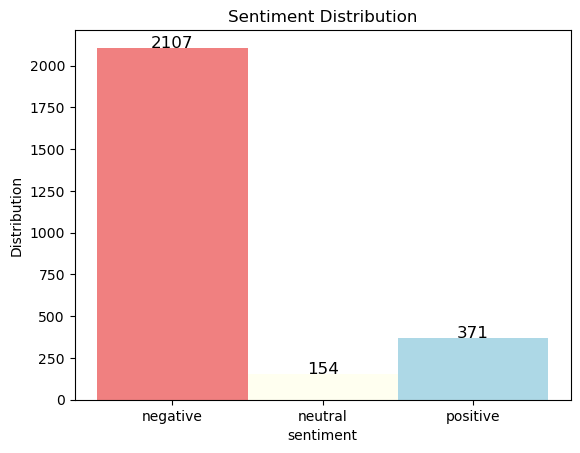

In [52]:
negative = new_data[new_data["new_review_rating"]== -1].shape[0]
positive = new_data[new_data["new_review_rating"]== 1].shape[0]
neutral = new_data[new_data["new_review_rating"]== 0].shape[0]

plt.bar([1,2,3],[negative,neutral, positive], tick_label = ['negative','neutral','positive'], width= 1, color =['lightcoral','ivory','lightblue'])

plt.text(1,negative,negative, fontsize= 12, color ='black' ,ha="center")
plt.text(2,neutral,neutral, fontsize= 12, color ='black' ,ha="center")
plt.text(3,positive,positive, fontsize= 12, color ='black' ,ha="center")


plt.xlabel("sentiment")
plt.ylabel("Distribution")
plt.title("Sentiment Distribution")

In [53]:
V_X_newtest = vectorizer.transform(newreviews)

In [54]:
V_X_newtest.shape

(2632, 8295)

In [55]:
classifiers = [SVM_model,RF_model,LR_model,NB_model]

for element in classifiers:
    print(element, "=",cross_val_score(element, V_X_newtest, newratings))

SVC() = [0.84250474 0.85199241 0.8460076  0.84030418 0.86121673]
RandomForestClassifier() = [0.85768501 0.78178368 0.83460076 0.82889734 0.84790875]
LogisticRegression(solver='liblinear') = [0.87666034 0.85199241 0.85931559 0.878327   0.85361217]
MultinomialNB() = [0.84250474 0.84629981 0.83460076 0.82889734 0.84030418]


In [56]:
NB_y_new_pred = NB_model.predict(V_X_newtest)
LR_y_new_pred = LR_model.predict(V_X_newtest)
RF_y_new_pred = RF_model.predict(V_X_newtest)
SVM_y_new_pred = SVM_model.predict(V_X_newtest)

In [57]:
print(classification_report(newratings,NB_y_new_pred, zero_division=0),classification_report(newratings,LR_y_new_pred, zero_division=0),classification_report(newratings,RF_y_new_pred, zero_division=0),classification_report(newratings,SVM_y_new_pred, zero_division=0),sep=("\n"+("-"*70)+"\n"))

              precision    recall  f1-score   support

          -1       0.92      0.86      0.89      2107
           0       0.16      0.40      0.23       154
           1       0.66      0.52      0.58       371

    accuracy                           0.78      2632
   macro avg       0.58      0.59      0.57      2632
weighted avg       0.84      0.78      0.81      2632

----------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.94      0.82      0.88      2107
           0       0.14      0.35      0.20       154
           1       0.53      0.61      0.57       371

    accuracy                           0.76      2632
   macro avg       0.54      0.59      0.55      2632
weighted avg       0.84      0.76      0.79      2632

----------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.90      0.90      0.

In [58]:
print(confusion_matrix(newratings,NB_y_new_pred),confusion_matrix(newratings,LR_y_new_pred),confusion_matrix(newratings,RF_y_new_pred),confusion_matrix(newratings,SVM_y_new_pred), sep=("\n"+("-"*20)+"\n"))

[[1807  229   71]
 [  64   62   28]
 [  86   93  192]]
--------------------
[[1723  227  157]
 [  51   54   49]
 [  50   93  228]]
--------------------
[[1894   53  160]
 [  97   11   46]
 [ 107   40  224]]
--------------------
[[1881   49  177]
 [  84   17   53]
 [  91   33  247]]
